In [1]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from python import OptimGSCS
import numpy as np
import logging
log_file = 'logs_lasso_test.log'
open(log_file, 'w').close()
logging.basicConfig(filename=log_file, level=logging.INFO)

from importlib import reload 

In [2]:
X, y, true_coef = make_regression(n_samples=10000, n_features=5000, n_informative=3000, coef=True, random_state=42)
clf = Lasso()
clf.fit(X,y)

Lasso()

In [3]:
def f(a):
    return(np.round(np.sum(np.abs(a)),2))

def g(a):
    clf.coef_ = a
    return(clf.score(X,y))

first_center = OptimGSCS.random_weights(clf.coef_, f, g)

In [4]:
reload(OptimGSCS)
experience = OptimGSCS.serie_random_weights(tolerance=0.999, center=first_center)
repeat = 0
logging.info(" | ".join([str("repeat"), str("experience.min_weight.performance"), str("experience.min_weight.norm")]))
logging.info(" | ".join([str(repeat), str(experience.min_weight.performance), str(experience.min_weight.norm)]))
min_norm = first_center.norm
while repeat <1000:
    repeat +=1
    experience.extend()
    logging.info(" | ".join([str(repeat), str(experience.min_weight.performance), str(experience.min_weight.norm)]))
    if not (repeat % 100):
        print(repeat, experience.min_weight.performance, experience.min_weight.norm)
        print(repeat, experience.last_center_gs.performance, experience.last_center_gs.norm)        

100 0.9990109370275785 143237.47
100 0.9995660793944449 143489.68
200 0.9990109370275785 143237.47
200 0.9995660793944449 143489.68
300 0.999000777457707 143235.63
300 0.9995660793944449 143489.68
400 0.999000777457707 143235.63
400 0.9995660793944449 143489.68
500 0.999000777457707 143235.63
500 0.9995660793944449 143489.68
600 0.999000777457707 143235.63
600 0.9995660793944449 143489.68
700 0.999000777457707 143235.63
700 0.9995660793944449 143489.68
800 0.999000777457707 143235.63
800 0.9995660793944449 143489.68
900 0.999000777457707 143235.63
900 0.9995660793944449 143489.68
1000 0.999000777457707 143235.63
1000 0.9995660793944449 143489.68


In [5]:
repeat_list, performance_list, norm_list = [], [], []
for line in open(log_file).readlines():
    if 'repeat' in line:
        continue
    line_s = line[10:].split(' | ')
    repeat_list.append(int(line_s[0]))
    performance_list.append(float(line_s[1]))
    norm_list.append(float(line_s[2]))

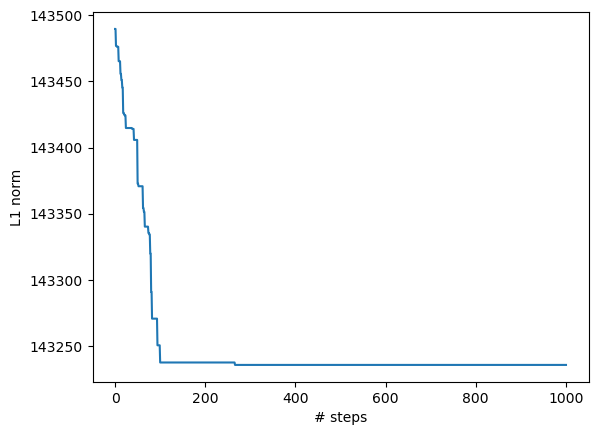

In [6]:
plt.xlabel('# steps')
plt.ylabel('L1 norm')
plt.plot(repeat_list, norm_list)

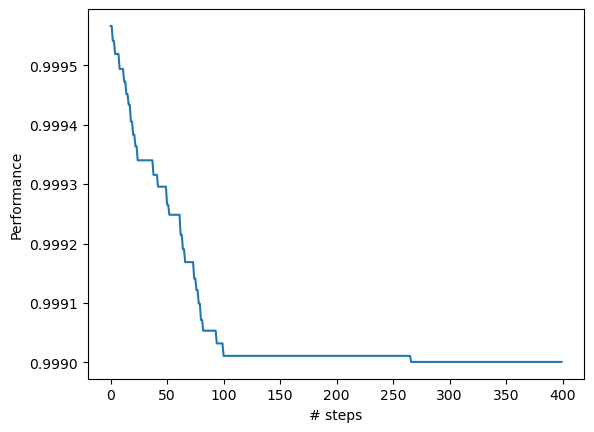

In [7]:
plt.xlabel('# steps')
plt.ylabel('Performance')
plt.plot(repeat_list[:400], performance_list[:400])

In [10]:
steps = list(range(len(repeat_list)))[1:]
steps_rs = [i for i in steps if not(i%2)]
steps_ls = [i for i in steps if i%2]
diminution_ls = [int(norm_list[i-1] > norm_list[i]) for i in steps_ls]
diminution_rs = [int(norm_list[i-1] > norm_list[i]) for i in steps_rs]

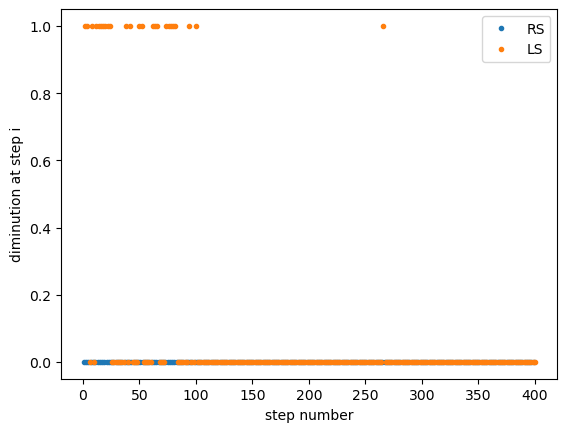

In [11]:
plt.xlabel('step number')
plt.ylabel('diminution at step i')
plt.plot(steps_ls[:200], diminution_ls[:200],'.')
plt.plot(steps_rs[:200], diminution_rs[:200],'.')
plt.legend(['RS','LS'])